## Spam filtering

Many of the e-mail services dedicate a special folder in their inboxes for the e-mails that are categorized as spams. The underlying mechanism that works behind the scenes is a text classification model which takes the content of the e-mail as input and returns a probability regarding this e-mail being a spam. This area of NLP is called **text classification** and we'll walk you through some applications of text categorization in the remainder of code.


In [2]:
import pandas as pd

# Load and simplify the dataset

In [3]:

#df = pd.read_csv(r'spam.csv',encoding='ISO-8859-1')
df = pd.read_csv('spam.csv',encoding='ISO-8859-1' )
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

# notice your class_labels

df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:



# exploring the dataset. Have a look at your class counts. 
# This will give you an idea whether you have an imbalanced 
# dataset problem
df['class_label'].value_counts()

ham     4825
spam     747
Name: class_label, dtype: int64

In [6]:
v,y=df['class_label'].value_counts()
v,y

(4825, 747)

In [16]:
#exploratory data analysis
#bar chart for initial data
import matplotlib.pyplot as ab
import numpy as np

labels = ['ham', 'spam']
counts = [4825, 747]
ypos = np.arange(len(labels)) #converting text labels to numberic value, 0 and 1
ypos

array([0, 1])

<BarContainer object of 2 artists>

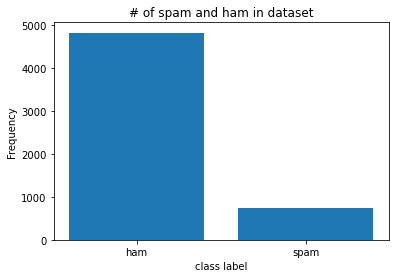

In [5]:

ab.xticks(ypos, labels)
ab.xlabel("class label")
ab.ylabel("Frequency")
ab.title("# of spam and ham in dataset")
ab.bar(ypos, counts)

In [6]:

df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
#separate both classes
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']

#convert the dataframe to a list. This is how you will print the wordcloud.
ham_list=df_ham['message'].tolist()
spam_list= df_spam['message'].tolist()
#spam_list

In [11]:
df_ham.iloc[:10,:]

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
10,ham,I'm gonna be home soon and i don't want to tal...
13,ham,I've been searching for the right words to tha...
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
16,ham,Oh k...i'm watching here:)


In [12]:
len(ham_list)

4825

In [13]:
filtered_spam = ("").join(spam_list) #convert the list into a string of spam
filtered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list) #convert the list into a string of ham
filtered_ham = filtered_ham.lower()
#filtered_spam

In [17]:
import os
from wordcloud import WordCloud
from PIL import Image
comment_mask = np.array(Image.open("comment.png"))


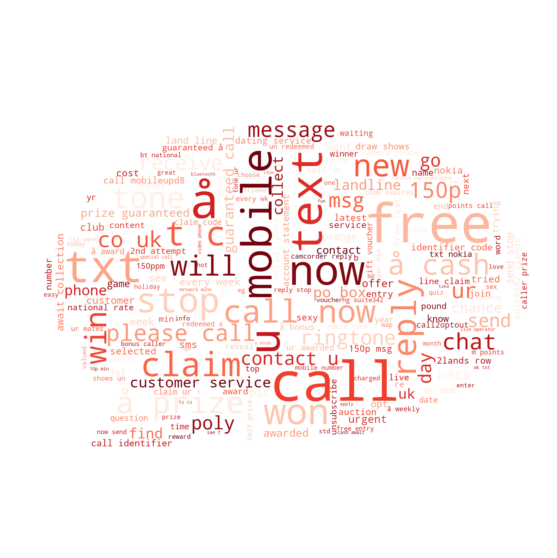

In [18]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask,
                      background_color = "white", colormap="Reds").generate(filtered_spam)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()


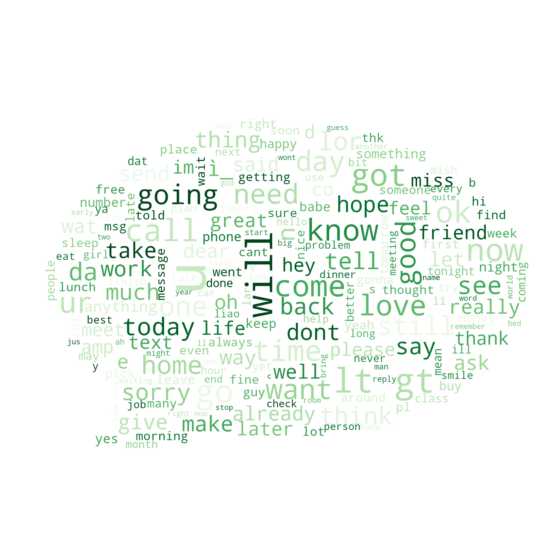

In [19]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", colormap="Greens").generate(filtered_ham)
 
# Display the generated image

ab.figure(figsize=[20,10])
ab.imshow(wordcloud, interpolation='bilinear')
ab.axis("off")

ab.margins(x=0, y=0)

ab.show()

In [20]:
# since class labels are strings, convert them to numbers: 1 for spam
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)


In [21]:
from sklearn.model_selection import train_test_split
# 30% test, 70% train split
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'], test_size = 0.3, random_state = 0)

print('rows in test set: ' + str(x_test.shape))
print('rows in train set: ' + str(x_train.shape))
type(x_train)

rows in test set: (1672,)
rows in train set: (3900,)


pandas.core.series.Series

# tfidf Vectorizer cell

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitting of the CountVectorizer consists of tokenization of the training data, 
# and building the vocabulary
# Transforming the CountVectorizer creates the bag-of-words representation
# of the train data.
# the bow is stored in a SciPy sparse matrix that only stores the nonzero
# entries. 
# to look at the actual content of the sparse matrix, convert it to dense 
# array using numpy.toarray() method

# vectorize email text into tfidf matrix
# TfidfVectorizer converts collection of raw documents to a matrix of TF-IDF features.
# It's equivalent to CountVectorizer followed by TfidfTransformer.
list = x_train.tolist()
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(list) #gives tf idf vector
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector
# after transform, boW with tfidf values are calculated. 

In [23]:
features_train_transformed.toarray().shape

(3900, 6839)

In [24]:
from sklearn.naive_bayes import MultinomialNB

# train a classifier
classifier = MultinomialNB()
classifier.fit(features_train_transformed, y_train)


MultinomialNB()

In [25]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(features_test_transformed, y_test) * 100))

classifier accuracy 96.41%


In [26]:
# accuracy looks good but  it is not a good indicator
# for imbalanced datasets. 

In [27]:
labels = classifier.predict(features_test_transformed)
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test.tolist() 
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )

score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1434    0]
 [  60  178]]
Accuracy Score : 0.9641148325358851
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1434
           1       1.00      0.75      0.86       238

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.92      1672
weighted avg       0.97      0.96      0.96      1672

F-Measure: 0.856


<AxesSubplot:>

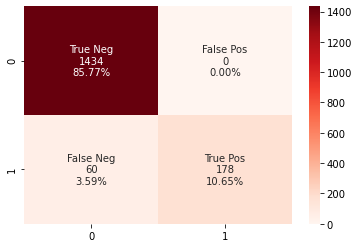

In [28]:
#heatmap for confusion matrix
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Reds')

# count vectorizer cell

In [55]:
list = x_train.tolist()
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(list) #get the document-term matrix.
print(word_count_vector.shape) #see the rows and columns of this matrix







(3900, 7127)


In [ ]:
#cv.vocabulary_

In [57]:
x_test_vector = cv.transform(x_test)

In [58]:


# train a classifier
classifier = MultinomialNB()
classifier.fit(word_count_vector, y_train)

MultinomialNB()

In [59]:
# review the classifier accuracy
print("classifier accuracy {:.2f}%".format(classifier.score(x_test_vector, y_test) * 100))

classifier accuracy 98.44%


In [60]:
labels = classifier.predict(x_test_vector)


  
actual = y_test
predicted = labels 
results = confusion_matrix(actual, predicted) 
  
print('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[1427    7]
 [  19  219]]
Accuracy Score : 0.9844497607655502
Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1434
           1       0.97      0.92      0.94       238

    accuracy                           0.98      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.98      0.98      0.98      1672

F-Measure: 0.944


<AxesSubplot:>

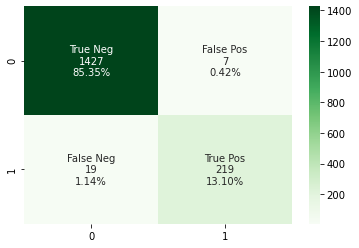

In [61]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Greens')

In [62]:
#Implementing cross validation on both the models 

#THIS CELL USES CROSS VALIDATION FOR COUNT VECTORIZER 

#%pip install scikit-learn

#%conda upgrade scikit-learn


from sklearn.model_selection import cross_val_score

X=df["message"].tolist()
Y=df["class_label"].tolist()
df

classifier = MultinomialNB()

cv = CountVectorizer(strip_accents = ascii) #initialize countVectorizer.
word_count_vector=cv.fit_transform(X) #get the document-term matrix.
#print(word_count_vector.shape) #see the rows and columns of this matrix

scores=cross_val_score(classifier,word_count_vector,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())



[0.98387097 0.98028674 0.98025135 0.98384201 0.98025135 0.98025135
 0.98204668 0.98384201 0.97127469 0.98922801]
0.9815145138768233


In [63]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(classifier,word_count_vector, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4758,   67],
       [  36,  711]])

<AxesSubplot:>

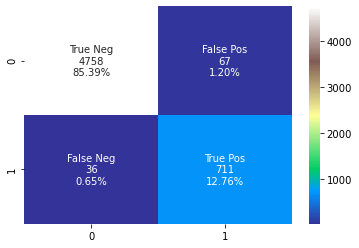

In [64]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='terrain')

In [65]:
vectorizer = TfidfVectorizer(
    input= list ,  # input is actual text
    lowercase=True,      # convert to lower case before tokenizing
    stop_words='english' # remove stop words
)
features_train_transformed = vectorizer.fit_transform(X) #gives tf idf vector
#features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector

classifier = MultinomialNB()

scores=cross_val_score(classifier,features_train_transformed,Y,cv=10,scoring='accuracy')

print(scores)

print(scores.mean())


[0.98387097 0.97849462 0.96947935 0.97845601 0.96947935 0.96768402
 0.97127469 0.97307002 0.97307002 0.98025135]
0.9745130402887975


In [66]:
y_pred = cross_val_predict(classifier,features_train_transformed, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)
conf_mat

array([[4824,    1],
       [ 141,  606]])

<AxesSubplot:>

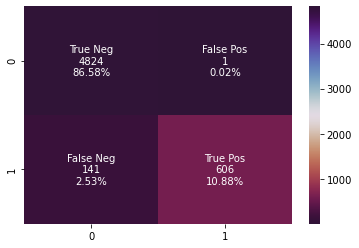

In [67]:
#heatmap for confusion matrix

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='twilight_shifted_r')